In [3]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
movies_df = pd.read_csv(r'D:\Data Analysis\Python Project\movies.csv')

In [7]:
# Handle missing values and transform data
movies_df['budget'] = movies_df['budget'].fillna(movies_df['budget'].median())
movies_df['gross'] = movies_df['gross'].fillna(movies_df['gross'].median())
movies_df['score'] = movies_df['score'].fillna(movies_df['score'].median())
movies_df['votes'] = movies_df['votes'].fillna(movies_df['votes'].median())
movies_df['runtime'] = movies_df['runtime'].fillna(movies_df['runtime'].median())
movies_df = movies_df.dropna(subset=['rating', 'released', 'writer', 'star', 'country', 'company'])
movies_df['year'] = movies_df['year'].astype(int)

In [11]:
movies_df = movies_df[movies_df['budget'] > 0]
movies_df = movies_df[movies_df['gross'] > 0]

In [19]:
# Log transformation for skewed data
movies_df['log_budget'] = np.log1p(movies_df['budget'])
movies_df['log_gross'] = np.log1p(movies_df['gross'])
movies_df['profit'] = movies_df['gross'] - movies_df['budget']
movies_df = movies_df[movies_df['profit'] > 0]
movies_df['log_profit'] = np.log1p(movies_df['profit'])

In [21]:
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,log_budget,log_gross,profit,log_profit
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,16.759950,17.665632,27998772.0,17.147671
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,15.319588,17.890555,54353106.0,17.811012
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,16.705882,20.104066,520375067.0,20.070060
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,15.068274,18.239801,79953539.0,18.196956
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,15.607270,17.500541,33846344.0,17.337342


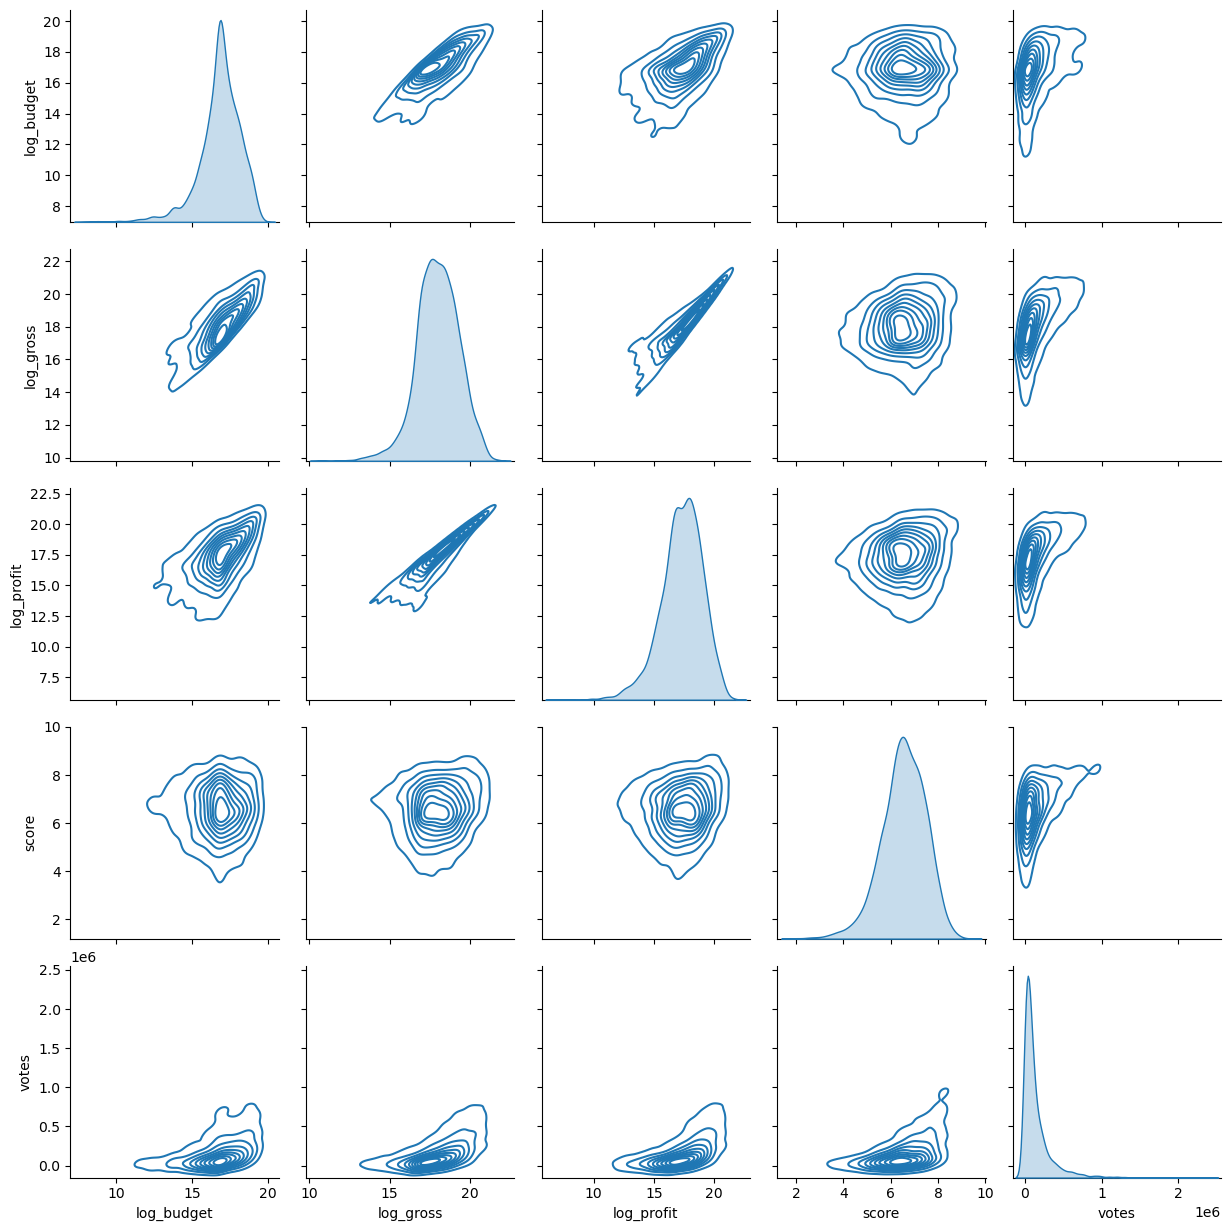

In [23]:
# KDE Pairplot
sns.pairplot(movies_df[['log_budget', 'log_gross', 'log_profit', 'score', 'votes']], kind="kde")
plt.show()

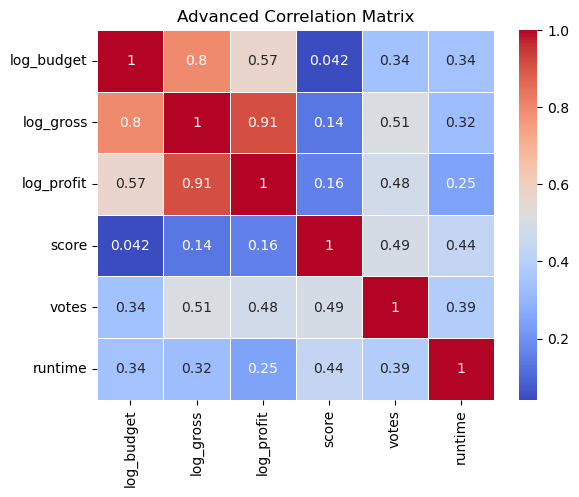

In [24]:
# Correlation Matrix
correlation_matrix_advanced = movies_df[['log_budget', 'log_gross', 'log_profit', 'score', 'votes', 'runtime']].corr()
sns.heatmap(correlation_matrix_advanced, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Advanced Correlation Matrix')
plt.show()

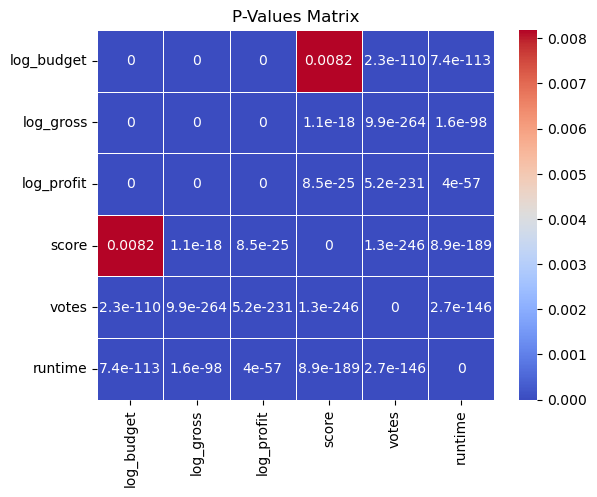

In [25]:
def corr_with_pvalues(df):
    cols = df.columns
    pvals = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)
    corrs = df.corr()
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            _, pval = pearsonr(df[cols[i]], df[cols[j]])
            pvals.iloc[i, j] = pval
            pvals.iloc[j, i] = pval
    return corrs, pvals

corr_matrix, pval_matrix = corr_with_pvalues(movies_df[['log_budget', 'log_gross', 'log_profit', 'score', 'votes', 'runtime']])
sns.heatmap(pval_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('P-Values Matrix')
plt.show()


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = movies_df[['log_budget', 'score', 'votes', 'runtime']]
y = movies_df['log_gross']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.5015427427173594
R-squared: 0.7041660275907402


Summary of Discoveries


Data Relationships: Budget, gross, and profit are closely related, with higher budgets generally leading to higher gross and profit. However, variables like score and votes, while still related, do not have as strong an impact.


Statistical Significance: The correlation analysis with p-values shows which relationships are statistically significant, confirming the importance of budget and profit in predicting gross revenue.



Model Insights: The linear regression model provides a quantitative way to predict gross revenue based on budget and other factors. The performance metrics give you an idea of how well the model generalizes to unseen data.